In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [2]:
df_qwen30b = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_30B.csv')
df_qwen30b_left_paw = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_left_blur.csv')
df_qwen30b_right_paw = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_right_blur.csv')
df_qwen30b_snout_blur = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_snout_blur.csv')

Total common filenames: 9


/tmp/ipykernel_2574207/1564486800.py:77: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


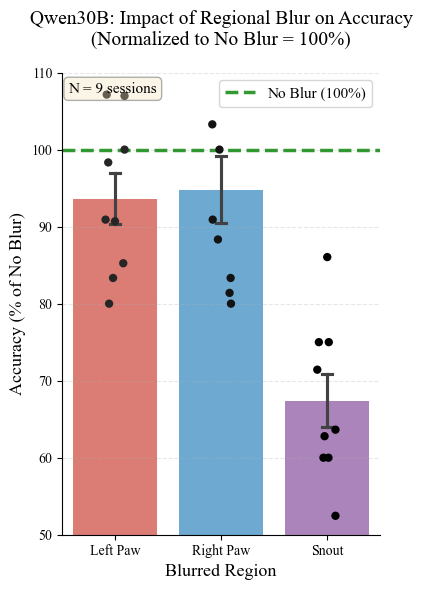

Plot saved!

Summary Statistics: Normalized Accuracy (% of No Blur)

                  mean        std       sem  count
blur_region                                       
Left Paw     93.626548  10.009522  3.336507      9
Right Paw    94.795935  12.985403  4.328468      9
Snout        67.373462  10.293196  3.431065      9

Performance Degradation from No Blur
Left Paw    : 93.6% (↓ 6.4% from no blur)
Right Paw   : 94.8% (↓ 5.2% from no blur)
Snout       : 67.4% (↓ 32.6% from no blur)

Statistical Tests (Wilcoxon Signed-Rank, paired)
Left Paw     vs No Blur: p = 0.0687 ns
Right Paw    vs No Blur: p = 0.2076 ns
Snout        vs No Blur: p = 0.0039 **

Pairwise Comparisons Between Blur Regions
Bonferroni corrected α = 0.0167
Left Paw     vs Right Paw   : p = 1.0000 ns
Left Paw     vs Snout       : p = 0.0032 ***
Right Paw    vs Snout       : p = 0.0032 ***



/home/murph_4090ws/miniconda3/envs/mpi_analysis/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
plt.rcParams['font.family'] = 'Times New Roman'
# Load all dataframes
df_qwen30b = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_30B.csv')
df_qwen30b_left_paw = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_left_blur.csv')
df_qwen30b_right_paw = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_right_blur.csv')
df_qwen30b_snout_blur = pd.read_csv('/mnt/teams/TM_Lab/Tony/wr_new/analysis_scripts/gemap/results/results_snout_blur.csv')

# Find common filenames across all dataframes
common_filenames = set(df_qwen30b['filename'])
common_filenames &= set(df_qwen30b_left_paw['filename'])
common_filenames &= set(df_qwen30b_right_paw['filename'])
common_filenames &= set(df_qwen30b_snout_blur['filename'])

print(f"Total common filenames: {len(common_filenames)}")

# Filter each dataframe to keep only common filenames
df_qwen30b = df_qwen30b[df_qwen30b['filename'].isin(common_filenames)].copy()
df_qwen30b_left_paw = df_qwen30b_left_paw[df_qwen30b_left_paw['filename'].isin(common_filenames)].copy()
df_qwen30b_right_paw = df_qwen30b_right_paw[df_qwen30b_right_paw['filename'].isin(common_filenames)].copy()
df_qwen30b_snout_blur = df_qwen30b_snout_blur[df_qwen30b_snout_blur['filename'].isin(common_filenames)].copy()

# Calculate normalized accuracy (relative to full Qwen30B)
df_merged = df_qwen30b[['filename']].copy()
df_merged['accuracy_full'] = df_qwen30b['accuracy']
df_merged['accuracy_left_paw_normalized'] = (df_qwen30b_left_paw['accuracy'].values / df_qwen30b['accuracy'].values) * 100
df_merged['accuracy_right_paw_normalized'] = (df_qwen30b_right_paw['accuracy'].values / df_qwen30b['accuracy'].values) * 100
df_merged['accuracy_snout_normalized'] = (df_qwen30b_snout_blur['accuracy'].values / df_qwen30b['accuracy'].values) * 100

# Melt for plotting
df_melt = df_merged.melt(
    id_vars=["filename"],
    value_vars=['accuracy_left_paw_normalized', 'accuracy_right_paw_normalized', 'accuracy_snout_normalized'],
    var_name="blur_region",
    value_name="normalized_accuracy"
)

# Clean up blur region names
df_melt["blur_region"] = df_melt["blur_region"].str.replace("accuracy_", "").str.replace("_normalized", "").str.replace("_", " ").str.title()

# Drop NaN values
df_melt = df_melt.dropna(subset=["normalized_accuracy"])

# Create figure
fig, ax = plt.subplots(figsize=(4, 6))

# Colors for different blur regions
blur_colors = {
    "Left Paw": "#e74c3c",    # Red
    "Right Paw": "#3498db",   # Blue
    "Snout": "#9b59b6"        # Purple
}

blur_order = ["Left Paw", "Right Paw", "Snout"]

# Bar plot
sns.barplot(
    data=df_melt,
    x="blur_region",
    y="normalized_accuracy",
    hue="blur_region",
    order=blur_order,
    hue_order=blur_order,
    errorbar="se",
    capsize=0.1,
    palette=blur_colors,
    ax=ax,
    alpha=0.8,
    legend=False
)

# Scatter individual points
sns.stripplot(
    data=df_melt,
    x="blur_region",
    y="normalized_accuracy",
    hue="blur_region",
    order=blur_order,
    hue_order=blur_order,
    dodge=False,
    jitter=True,
    #alpha=0.5,
    size=6,
    color='black',#palette=blur_colors,
    ax=ax,
    legend=False
)

# Styling
ax.axhline(y=100, color='green', linestyle='--', linewidth=2.5, alpha=0.8, label='No Blur (100%)')
ax.set_ylim(50, 110)
ax.set_ylabel("Accuracy (% of No Blur)", fontsize=13,)
ax.set_xlabel("Blurred Region", fontsize=13)
ax.set_title('Qwen30B: Impact of Regional Blur on Accuracy\n(Normalized to No Blur = 100%)', 
             fontsize=14, pad=20)

# Add sample size
n_samples = df_melt.groupby("filename").ngroups
ax.text(0.02, 0.98, f'N = {n_samples} sessions', transform=ax.transAxes,
        fontsize=11, verticalalignment='top', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Legend moved to upper right
ax.legend(loc='upper right', fontsize=11)

# Add grid for easier reading
ax.grid(axis='y', alpha=0.3, linestyle='--')

sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('qwen30b_blur_comparison.svg', dpi=300, bbox_inches='tight')
plt.savefig('qwen30b_blur_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved!")

# Calculate and print statistics
print("\n" + "="*70)
print("Summary Statistics: Normalized Accuracy (% of No Blur)")
print("="*70)

summary = df_melt.groupby("blur_region")["normalized_accuracy"].agg(['mean', 'std', 'sem', 'count'])
print("\n" + summary.to_string())

print("\n" + "="*70)
print("Performance Degradation from No Blur")
print("="*70)

for region in blur_order:
    region_data = df_melt[df_melt["blur_region"] == region]["normalized_accuracy"]
    mean_val = region_data.mean()
    degradation = 100 - mean_val
    print(f"{region:12s}: {mean_val:.1f}% (↓ {degradation:.1f}% from no blur)")

# Statistical tests (paired because same sessions)
print("\n" + "="*70)
print("Statistical Tests (Wilcoxon Signed-Rank, paired)")
print("="*70)

# Compare each blur condition to 100%
blur_columns = {
    "Left Paw": 'accuracy_left_paw_normalized',
    "Right Paw": 'accuracy_right_paw_normalized',
    "Snout": 'accuracy_snout_normalized'
}

for region, col in blur_columns.items():
    region_data = df_merged[col].dropna()
    baseline = pd.Series([100] * len(region_data))
    
    # Wilcoxon signed-rank test (paired, non-parametric)
    stat, p_value = wilcoxon(region_data, baseline)
    
    sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"{region:12s} vs No Blur: p = {p_value:.4f} {sig}")

# Pairwise comparisons between blur regions
print("\n" + "="*70)
print("Pairwise Comparisons Between Blur Regions")
print("="*70)

from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

pairs = [
    ("Left Paw", "Right Paw"),
    ("Left Paw", "Snout"),
    ("Right Paw", "Snout")
]

p_values = []
for region1, region2 in pairs:
    data1 = df_melt[df_melt["blur_region"] == region1]["normalized_accuracy"]
    data2 = df_melt[df_melt["blur_region"] == region2]["normalized_accuracy"]
    
    u_stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    p_values.append(p)

# Apply Bonferroni correction
reject, p_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

print(f"Bonferroni corrected α = {0.05/len(p_values):.4f}")
for i, (region1, region2) in enumerate(pairs):
    sig = "***" if reject[i] else "ns"
    print(f"{region1:12s} vs {region2:12s}: p = {p_corrected[i]:.4f} {sig}")

print("\n" + "="*70)